In [24]:
import numpy as np

In [25]:
#prims algorithm for finding minimum spanning tree
n_vertex= int(input("No. of vertex: "))
n_edges= int(input("No. of edges: "))

No. of vertex: 7
No. of edges: 11


In [26]:
#store weight of edges in adjacency matrix
#initialize all entries of adjacency matrix with 0
adjacency= np.zeros((n_vertex,n_vertex),dtype=int)

#get weight of each edge in undirected graph
print('Enter source, destination and weight')
for i in range(n_edges):
    src,dest,weight= map(str,input().split())
  
    #convert string to int
    weight= int(weight)
    
    #convert alphabets to index of node
    #0 INDEX IS USED BECAUSE ASCII NEEDS CHAR TYPE ARGUMENT
    src= ord(src)-65
    dest= ord(dest)-65
    
    #assign weight to edges
    adjacency[src][dest]= weight
    adjacency[dest][src]= weight

Enter source, destination and weight
A B 10
A C 22
A D 7
B C 30
B E 49
C E 10
C F 4
C D 26
D F 22
E G 2
F G 5


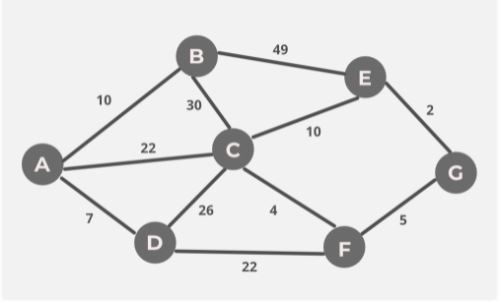

In [27]:
from IPython import display
display.Image("./prims.JPG")

In [28]:
#adjacency

In [29]:
'''algo
1. Take 3 arrays- i.e. parent, visited, cost (size of all arrays will be equal to no. of vertex in graph)
(Initialize parent with -1, visited with False and cost with infinity except first node.
We are using parent array so that we can retrieve minimum spanning tree.
Visited keeps check of nodes which has been included in mst.
Cost stores weight of edges to form mst.) 
2. Take node with smallest cost and which is unvisited also.
3. Relax all outgoing edges from it.
4. Repeat steps 2 and 3 until all nodes have been visited.
5. With the help of parent array get mst
'''

'algo\n1. Take 3 arrays- i.e. parent, visited, cost (size of all arrays will be equal to no. of vertex in graph)\n(Initialize parent with -1, visited with False and cost with infinity except first node.\nWe are using parent array so that we can retrieve minimum spanning tree.\nVisited keeps check of nodes which has been included in mst.\nCost stores weight of edges to form mst.) \n2. Take node with smallest cost and which is unvisited also.\n3. Relax all outgoing edges from it.\n4. Repeat steps 2 and 3 until all nodes have been visited.\n5. With the help of parent array get mst\n'

In [30]:
#initilization of required arrays

parent= np.array([-1]*n_vertex,dtype=int)
visited= np.array([False]*n_vertex,dtype=bool)

temp= [0] #cost from source to source
temp.extend([1000]*(n_vertex-1))
cost= np.array(temp,dtype=int)

In [31]:
#find node with minimum cost and which is not visited
def find_min(cost,visited):
    min_cost= 1000
    index= -1
    
    for i in range(len(cost)):
        if cost[i]<min_cost and not visited[i]:
            #update min_cost
            min_cost= cost[i]
            index= i
            
    return index

#tc-O(V^2)
#sc- O(V)
def prims(adjacency,n_vertex,cost,parent,visited):
    
    #Run loop until all nodes have been visited
    while False in visited:
        #find node with minimum cost and which is not visited
        index= find_min(cost,visited)
        #print('index '+str(index))
        
        for i in range(n_vertex):
            #check if edge exists and vertex i is unvisited
            if adjacency[index][i]!=0 and not visited[i]:
                #print(i)
                #relax outgoing edges
                if adjacency[index][i]<cost[i]:
                    cost[i]= adjacency[index][i]
                    #update parent
                    parent[i]= index
        
        #print(index)
        #mark index node as visited
        visited[index]= True

In [32]:
try:
    prims(adjacency,n_vertex,cost,parent,visited)
except:
    print('Code not working')
    pass

In [33]:
#in numpy array we can change data type of values
#therefore, we will take a new array to store parent
parent_= np.array(['A']*n_vertex)

#update parent array containing parent as index to alphabet
for i in range(n_vertex):
    #source node
    if parent[i]!=-1:
        parent_[i]= chr(65+parent[i])

In [34]:
print('cost ',cost)
print('parent ',parent_)
print('visited ',visited)

cost  [ 0 10 22  7  2  4  5]
parent  ['A' 'A' 'A' 'A' 'G' 'C' 'F']
visited  [ True  True  True  True  True  True  True]


In [35]:
print('Cost of minimum spanning tree is ',sum(cost))

Cost of minimum spanning tree is  50
